In [3]:
# Install dependencies
!pip install requests beautifulsoup4 pandas numpy sentence-transformers ipywidgets matplotlib openpyxl reportlab

# Enable ipywidgets in Colab
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
   

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Initialize NLP model for matching
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
# UI Module
def create_ui():
    procurement_platform = widgets.Dropdown(
        options=["1688", "Shopee Taiwan"],
        description="Procurement:",
        style={'description_width': 'initial'}
    )
    sales_platform = widgets.Dropdown(
        options=["Rakuten Japan", "Shopee Taiwan"],
        description="Sales:",
        style={'description_width': 'initial'}
    )
    time_range = widgets.Dropdown(
        options=["Today", "7 Days", "30 Days", "Half Year", "One Year"],
        description="Time Range:",
        style={'description_width': 'initial'}
    )
    target_audience = widgets.Dropdown(
        options=["Male", "Female", "Youth", "Middle-aged", "Family", "Moms", "Trendy"],
        description="Audience:",
        style={'description_width': 'initial'}
    )
    category = widgets.Dropdown(
        options=["Electronics", "Beauty", "Fashion", "Food", "Household"],
        description="Category:",
        style={'description_width': 'initial'}
    )
    analyze_button = widgets.Button(description="Start Analysis")

    # Display widgets
    display(procurement_platform, sales_platform, time_range, target_audience, category, analyze_button)

    # Store config
    config = {}

    def on_analyze_clicked(b):
        config.update({
            "procurement_platform": procurement_platform.value,
            "sales_platform": sales_platform.value,
            "time_range": time_range.value,
            "target_audience": target_audience.value,
            "category": category.value
        })
        display(HTML("<b>Analysis Started!</b>"))

    analyze_button.on_click(on_analyze_clicked)
    return config

# Run UI
config = create_ui()

Dropdown(description='Procurement:', options=('1688', 'Shopee Taiwan'), style=DescriptionStyle(description_wid…

Dropdown(description='Sales:', options=('Rakuten Japan', 'Shopee Taiwan'), style=DescriptionStyle(description_…

Dropdown(description='Time Range:', options=('Today', '7 Days', '30 Days', 'Half Year', 'One Year'), style=Des…

Dropdown(description='Audience:', options=('Male', 'Female', 'Youth', 'Middle-aged', 'Family', 'Moms', 'Trendy…

Dropdown(description='Category:', options=('Electronics', 'Beauty', 'Fashion', 'Food', 'Household'), style=Des…

Button(description='Start Analysis', style=ButtonStyle())

In [11]:
# Scraper Module
def scrape_sales_platform(platform, time_range, target_audience, category):
    # Mock scraping (replace with actual requests.get() and BeautifulSoup parsing)
    print(f"Scraping {platform} for {category}, {target_audience}, {time_range}...")

    # Mock data for Top 10 products
    products = [
        {
            "name": f"Product {i}",
            "image": f"https://example.com/images/product{i}.jpg",
            "selling_price": 100 + i * 10,
            "monthly_sales": 500 - i * 50,
            "rating": 4.5 - i * 0.1,
            "review_count": 1000 - i * 100,
            "traffic": 10000 - i * 1000,
            "competing_sellers": [
                {"seller": f"Seller {j}", "price": 95 + i * 10, "sales": 200 - j * 20}
                for j in range(3)
            ]
        } for i in range(1, 11)
    ]
    return products

def scrape_procurement_platform(platform, product_name):
    # Mock scraping
    print(f"Searching {platform} for {product_name}...")
    return {
        "name": f"{product_name} (Procured)",
        "image": f"https://example.com/images/{product_name.lower()}.jpg",
        "supplier_url": f"https://example.com/{platform.lower()}/product/{product_name.lower()}",
        "unit_price": 50  # Mock average price
    }

In [12]:
# Matcher Module
def match_products(sales_products, procurement_platform):
    matched_products = []

    for product in sales_products:
        matched = scrape_procurement_platform(procurement_platform, product["name"])

        # NLP-based matching
        sales_embedding = model.encode(product["name"], convert_to_tensor=True)
        proc_embedding = model.encode(matched["name"], convert_to_tensor=True)
        similarity = util.cos_sim(sales_embedding, proc_embedding).item()

        if similarity > 0.7:
            matched_products.append({
                "sales_product": product,
                "procurement_product": matched,
                "similarity": similarity
            })

    return matched_products

In [18]:
# Profit Calculator Module
def get_exchange_rate(from_currency, to_currency):
    rates = {
        "CNY": {"JPY": 20.0, "TWD": 4.5},
        "TWD": {"JPY": 4.0, "TWD": 1.0}
    }
    return rates.get(from_currency, {}).get(to_currency, 1.0)

def calculate_profit(matched_products, sales_platform, procurement_platform):
    results = []

    # Mock exchange rates and fees
    from_currency = "CNY" if procurement_platform == "1688" else "TWD"
    to_currency = "JPY" if sales_platform == "Rakuten Japan" else "TWD"
    exchange_rate = get_exchange_rate(from_currency, to_currency)
    shipping_cost = 10
    platform_fee_rate = 0.1

    for match in matched_products:
        sales = match["sales_product"]
        proc = match["procurement_product"]

        selling_price = sales["selling_price"] * exchange_rate
        procurement_cost = proc["unit_price"]
        platform_fee = selling_price * platform_fee_rate
        profit = selling_price - procurement_cost - shipping_cost - platform_fee
        gross_margin = (profit / selling_price) * 100 if selling_price > 0 else 0

        results.append({
            "name": sales["name"],
            "selling_price": round(selling_price, 2),
            "procurement_price": procurement_cost,
            "profit": round(profit, 2),
            "gross_margin": round(gross_margin, 2),
            "supplier_link": proc["supplier_url"],
            "image": sales["image"],
            "sales_volume": sales["monthly_sales"],
            "rating": sales["rating"],
            "review_count": sales["review_count"],
            "competing_products": len(sales["competing_sellers"])
        })

    return results

In [14]:
# Output Module
def display_results(results):
    df = pd.DataFrame(results)

    # Display table
    print("\nAnalysis Results:")
    display(df)

    # Plot ROI distribution
    plt.figure(figsize=(10, 6))
    plt.bar(df["name"], df["gross_margin"], color='skyblue')
    plt.xlabel("Product")
    plt.ylabel("Gross Margin (%)")
    plt.title("ROI Distribution Across Products")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Highlight highest profit
    if not df.empty:
        highest_profit = df.loc[df["profit"].idxmax()]
        print("\nHighest Profit Match:")
        display(highest_profit)

    # Export to CSV
    df.to_csv("analysis_results.csv", index=False)
    print("\nExported results to analysis_results.csv")

# Optional: Export to Excel (if needed)
def export_to_excel(results):
    df = pd.DataFrame(results)
    df.to_excel("analysis_results.xlsx", index=False)
    print("Exported results to analysis_results.xlsx")

Starting analysis...
Scraping Shopee Taiwan for Fashion, Family, 30 Days...
Searching Shopee Taiwan for Product 1...
Searching Shopee Taiwan for Product 2...
Searching Shopee Taiwan for Product 3...
Searching Shopee Taiwan for Product 4...
Searching Shopee Taiwan for Product 5...
Searching Shopee Taiwan for Product 6...
Searching Shopee Taiwan for Product 7...
Searching Shopee Taiwan for Product 8...
Searching Shopee Taiwan for Product 9...
Searching Shopee Taiwan for Product 10...

Analysis Results:


,name,selling_price,procurement_price,profit,gross_margin,supplier_link,image,sales_volume,rating,review_count,competing_products
0,Product 4,140.0,50,66.0,47.14,https://example.com/shopee taiwan/product/prod...,https://example.com/images/product4.jpg,300,4.1,600,3
1,Product 5,150.0,50,75.0,50.00,https://example.com/shopee taiwan/product/prod...,https://example.com/images/product5.jpg,250,4.0,500,3
2,Product 6,160.0,50,84.0,52.50,https://example.com/shopee taiwan/product/prod...,https://example.com/images/product6.jpg,200,3.9,400,3
3,Product 7,170.0,50,93.0,54.71,https://example.com/shopee taiwan/product/prod...,https://example.com/images/product7.jpg,150,3.8,300,3
4,Product 8,180.0,50,102.0,56.67,https://example.com/shopee taiwan/product/prod...,https://example.com/images/product8.jpg,100,3.7,200,3
5,Product 9,190.0,50,111.0,58.42,https://example.com/shopee taiwan/product/prod...,https://example.com/images/product9.jpg,50,3.6,100,3


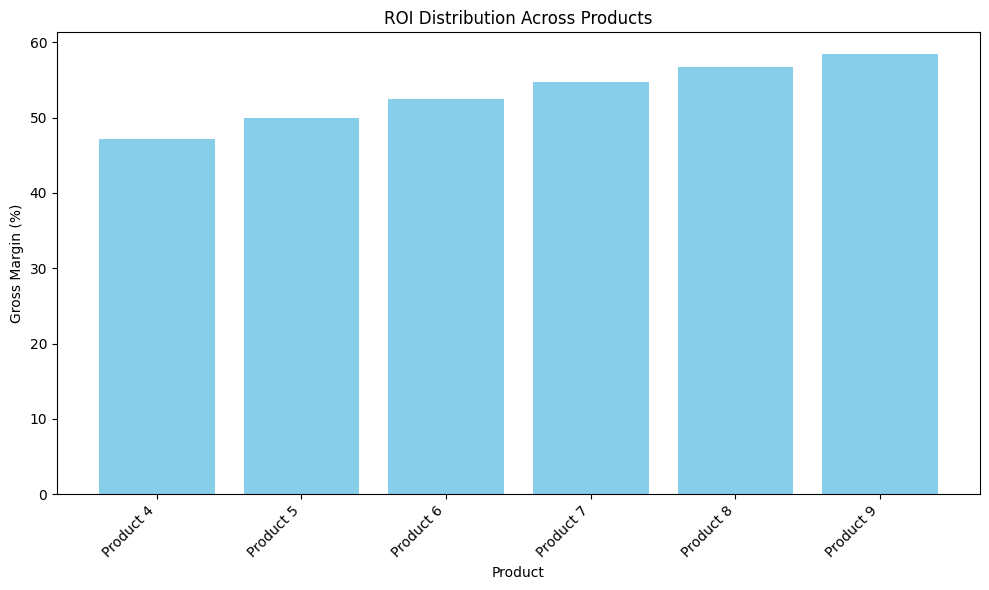


Highest Profit Match:


,5
name,Product 9
selling_price,190.0
procurement_price,50
profit,111.0
gross_margin,58.42
supplier_link,https://example.com/shopee taiwan/product/prod...
image,https://example.com/images/product9.jpg
sales_volume,50
rating,3.6
review_count,100



Exported results to analysis_results.csv
Exported results to analysis_results.xlsx


In [17]:
# Main Pipeline
def run_analysis(config):
    if config:
        print("Starting analysis...")

        # Scrape Sales Platform
        sales_products = scrape_sales_platform(
            config["sales_platform"],
            config["time_range"],
            config["target_audience"],
            config["category"]
        )

        # Match products
        matched_products = match_products(sales_products, config["procurement_platform"])

        # Calculate profits
        results = calculate_profit(
            matched_products,
            config["sales_platform"],
            config["procurement_platform"]
        )

        # Display and export results
        display_results(results)
        export_to_excel(results)

# Wait for user to click "Start Analysis" (Colab limitation: run manually after UI interaction)
# After clicking the button in the UI, run this cell
run_analysis(config)